In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_train_1 = np.load('/hard/lilu/x_train_1.npy')
y_train_1 = np.load('/hard/lilu/y_train_1.npy')
x_valid_1 = np.load('/hard/lilu/x_valid_1.npy')
y_valid_1 = np.load('/hard/lilu/y_valid_1.npy')
x_test_1 = np.load('/hard/lilu/x_test_1.npy')
y_test_1 = np.load('/hard/lilu/y_test_1.npy')

In [3]:
x_train_1.shape

(1462, 7, 224, 224)

In [4]:
y_train_1.shape

(1462, 1, 224, 224)

In [16]:
y_train_pred_1 = np.load('/hard/lilu/y_train_pred_1.npy')
y_test_pred_1 = np.load('/hard/lilu/y_test_pred_1.npy')
y_valid_pred_1 = np.load('/hard/lilu/y_valid_pred_1.npy')

In [17]:
y_train_obs_1 = np.load('/hard/lilu/y_train_obs_1.npy')
y_test_obs_1 = np.load('/hard/lilu/y_test_obs_1.npy')
y_valid_obs_1 = np.load('/hard/lilu/y_valid_obs_1.npy')

In [22]:
y_test_pred_1.shape

(512, 1, 224, 224, 1)

In [21]:
y_test_obs_1.shape

(512, 1, 224, 224, 1)

In [18]:
r2_train = np.full((7, 224, 224), np.nan)
r2_valid = np.full((7, 224, 224), np.nan)
r2_test = np.full((7, 224, 224), np.nan)

r_train = np.full((7, 224, 224), np.nan)
r_test = np.full((7, 224, 224), np.nan)
r_valid = np.full((7, 224, 224), np.nan)

rmse_train = np.full((7, 224, 224), np.nan)
rmse_test = np.full((7, 224, 224), np.nan)
rmse_valid = np.full((7, 224, 224), np.nan)

from sklearn.metrics import r2_score, mean_squared_error

for i in range(1):
    for j in range(224):
        for k in range(224):
            
            r2_train[i,j,k] = r2_score(y_train_obs_1[:,i, j,k,0],y_train_pred_1[:,i,j,k,0])
            r2_test[i,j,k] = r2_score(y_test_obs_1[:,i, j,k,0],y_test_pred_1[:,i,j,k,0])
            r2_valid[i,j,k] = r2_score(y_valid_obs_1[:, i,j,k,0],y_valid_pred_1[:,i,j,k,0])
   
            r_train[i,j,k] = np.corrcoef(y_train_obs_1[:, i,j,k,0],y_train_pred_1[:,i,j,k,0])[0,1]
            r_test[i,j,k] = np.corrcoef(y_test_obs_1[:,i, j,k,0],y_test_pred_1[:,i,j,k,0])[0,1]
            r_valid[i,j,k] = np.corrcoef(y_valid_obs_1[:, i,j,k,0],y_valid_pred_1[:,i,j,k,0])[0,1]

            rmse_train[i,j,k] = np.sqrt(mean_squared_error(y_train_obs_1[:, i, j,k,0],y_train_pred_1[:,i,j,k,0]))
            rmse_test[i,j,k] = np.sqrt(mean_squared_error(y_test_obs_1[:, i,j,k,0],y_test_pred_1[:,i,j,k,0]))
            rmse_valid[i,j,k] = np.sqrt(mean_squared_error(y_valid_obs_1[:, i,j,k,0],y_valid_pred_1[:,i,j,k,0]))        

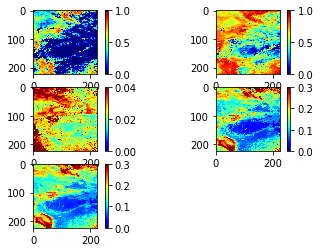

In [19]:
plt.subplot(3,2,1)
plt.imshow(r2_test[0,:,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()

plt.subplot(3,2,2)
plt.imshow(r_test[0, :,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()

plt.subplot(3,2,3)
plt.imshow(rmse_test[0, :,:],vmin=0, vmax=0.04, cmap='jet')
plt.colorbar()

plt.subplot(3,2,4)
plt.imshow(np.nanmean(y_test_obs_1[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

plt.subplot(3,2,5)
plt.imshow(np.nanmean(y_test_pred_1[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

In [33]:
r_test

array([[[0.30075272, 0.50580691, 0.4591191 , ..., 0.83581797,
         0.74032557, 0.21429765],
        [0.635892  , 0.57437999, 0.56616037, ..., 0.94318619,
         0.93474836, 0.55867443],
        [0.62487807, 0.60693853, 0.54100039, ..., 0.80439324,
         0.89135149, 0.44147292],
        ...,
        [0.4708223 , 0.64023284, 0.61304127, ..., 0.92997669,
         0.92418848, 0.74718926],
        [0.45860571, 0.67121708, 0.65569472, ..., 0.93636692,
         0.92210978, 0.73725099],
        [0.12657671, 0.51886799, 0.51450113, ..., 0.79155261,
         0.83849448, 0.71725404]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

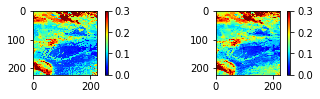

In [32]:
plt.subplot(3,2,1)
plt.imshow(y_test_obs_1[200, 0,:,:,0],vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

plt.subplot(3,2,2)
plt.imshow(y_test_pred_1[200, 0,:,:,0],vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

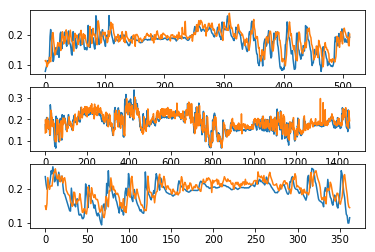

In [30]:
plt.subplot(3,1,1)
plt.plot(y_test_obs_1[:, 0, 100, 100, 0])
plt.plot(y_test_pred_1[:, 0, 100, 100, 0])

plt.subplot(3,1,2)
plt.plot(y_train_obs_1[:,  0, 100, 100, 0])
plt.plot(y_train_pred_1[:, 0, 100, 100, 0])


plt.subplot(3,1,3)
plt.plot(y_valid_obs_1[:,  0, 100, 100, 0])
plt.plot(y_valid_pred_1[:, 0, 100, 100, 0])